# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential,Model                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.applications.vgg16 import VGG16
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
#Connecting Google drive with Google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = np.load('/content/drive/My Drive/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/My Drive/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)


(4750, 128, 128, 3)


**Observation:**
 The number of samples is 4750, indicating the quantity of images in the dataset. The height of each image is 128 pixels, representing the number of rows. The width of each image is 128 pixels, representing the number of columns. The number of channels is 3, denoting the color channels in each pixel, typically representing the Red, Green, and Blue (RGB) color channels. Each channel provides information about the intensity of a particular color.

In [ ]:
print(labels.shape)

(4750, 1)


There are 4750 labels

In [ ]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


**Observation:** The output indicates that the labels DataFrame has one column named "Label," containing 4750 non-null entries with an object data type. There are no missing values in the "Label" column.Total memory usage is approximately 37.2+ MB.

In [ ]:
labels.describe()

,Label
count,4750
unique,12
top,Loose Silky-bent
freq,654


**Observation:** The dataset does not contain any missing values. The "Label" column encompasses 12 unique values, representing different labels. Among these, "Loose Silky-bent" is the most prevalent label, appearing 654 times out of the total 4750 entries.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

**Visualizing images randomly from each of the classes.**

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

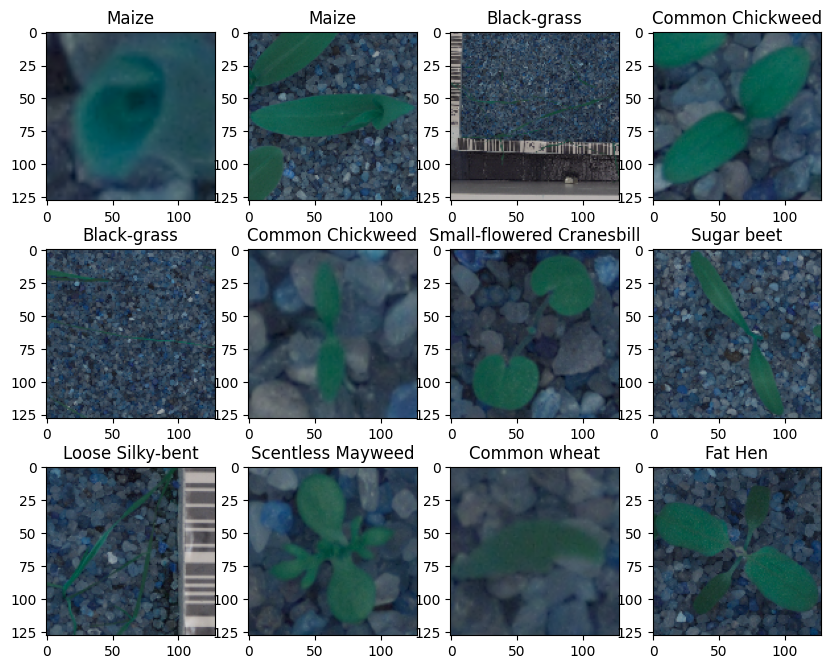

In [ ]:
plot_images(images,labels)

**Observation:**
The images exhibit a common theme, featuring young seedlings in a setting of small granular material or rocks. Additionally, certain images include a scale, possibly depicted as a black and white barred ruler. Considering the possibility that the images might be in the BGR color space and displayed as RGB, there is a plan to convert them to assess potential improvements in visual representation. Additionally, a crucial step involves checking the dataset's balance to ensure an equitable distribution of images, enhancing the effectiveness of subsequent analyses or machine learning tasks.

### Checking the distribution of the target variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

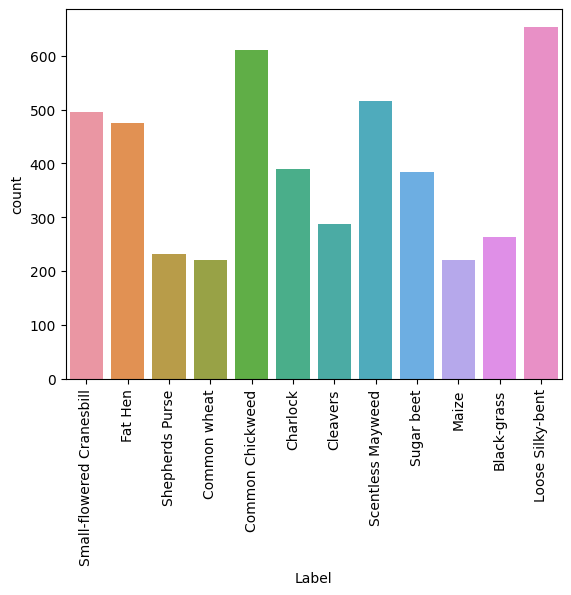

In [ ]:
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')

**Observation:**We observe that the dataset appears to be  imbalanced, with each category having  different number of images.


In [ ]:
# number of labels for each plant type
labels['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

**observation**
Loose Silky-bent: 654

This label appears 654 times in the dataset, making it the most frequent class.
Common Chickweed: 611

This label appears 611 times, making it the second most frequent class.
Scentless Mayweed: 516

This label appears 516 times, making it the third most frequent class.
Small-flowered Cranesbill: 496

This label appears 496 times.
Fat Hen: 475

This label appears 475 times.
Charlock: 390

This label appears 390 times.
Sugar beet: 385

This label appears 385 times.
Cleavers: 287

This label appears 287 times.
Black-grass: 263

This label appears 263 times.
Shepherds Purse: 231

This label appears 231 times.
Common wheat: 221

This label appears 221 times.
Maize: 221

This label also appears 221 times.

In [ ]:
# check the percentage of each label value
for i in labels['Label'].unique():
  print(i, ": ", (labels[labels['Label']==i].count()/labels.shape[0])*100, "\n")

Small-flowered Cranesbill :  Label    10.442105
dtype: float64 

Fat Hen :  Label    10.0
dtype: float64 

Shepherds Purse :  Label    4.863158
dtype: float64 

Common wheat :  Label    4.652632
dtype: float64 

Common Chickweed :  Label    12.863158
dtype: float64 

Charlock :  Label    8.210526
dtype: float64 

Cleavers :  Label    6.042105
dtype: float64 

Scentless Mayweed :  Label    10.863158
dtype: float64 

Sugar beet :  Label    8.105263
dtype: float64 

Maize :  Label    4.652632
dtype: float64 

Black-grass :  Label    5.536842
dtype: float64 

Loose Silky-bent :  Label    13.768421
dtype: float64 



In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
  '''
  Barplot with percentage at the top
  data: dataframe
  feature: dataframe column
  perc:
  whether to display percentages instead of count (default is False)
  n: displays the top n category levels (defaul is None, i.e., display all levels)
  '''
  total = len(data[feature]) #length of the column
  count = data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count + 2, 6))
  else:
    plt.figure(figsize=(n + 2, 6))
  plt.xticks(rotation=90, fontsize=15)
  ax = sns.countplot(
      data=data,
      x=feature,
      palette='Paired',
      order=data[feature].value_counts().index[:n]
  )
  for p in ax.patches:
    if perc == True:
      label = '{:.1f}%'.format(
          100*p.get_height()/total
      ) # percentage of each class of the category
    else:
      label = p.get_height() # count of each level of the category
    x = p.get_x() + p.get_width()/2 # width of the plot
    y = p.get_height() # height of the plot

    #annotate the percentage
    ax.annotate(
        label,
        (x, y),
        ha='center',
        va='center',
        size=12,
        xytext=(0,5),
        textcoords='offset points',
    )
plt.show()

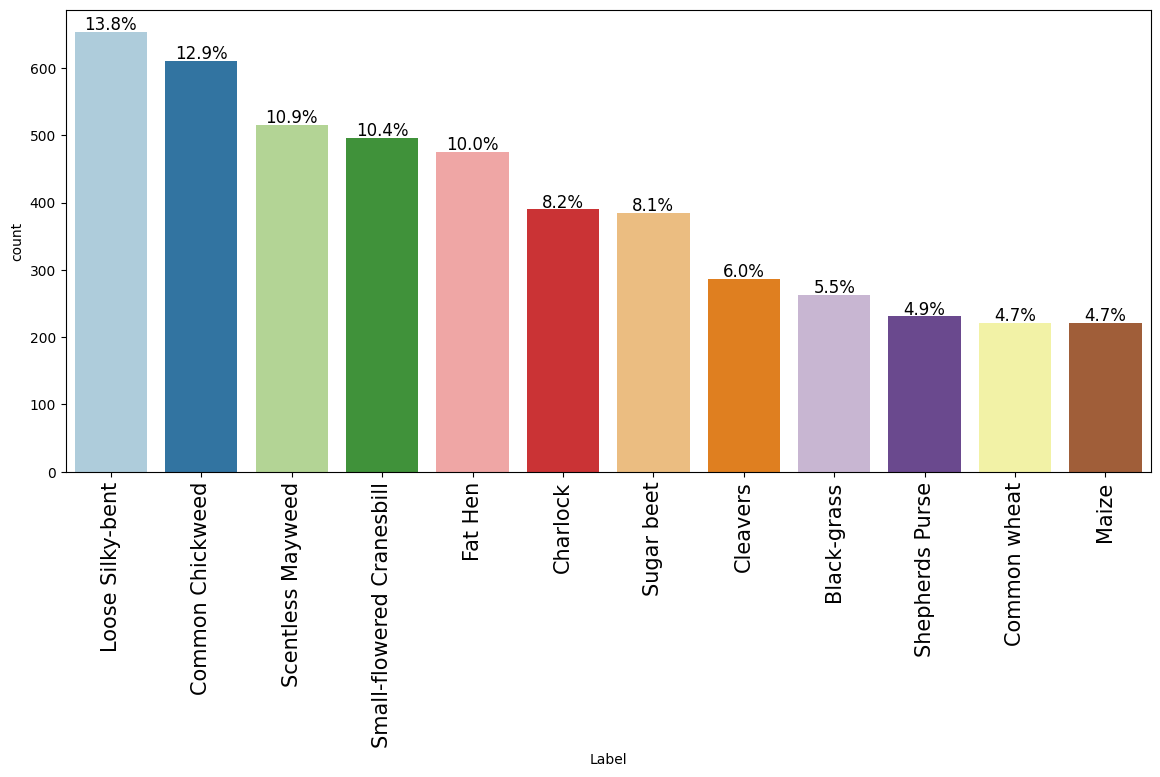

In [ ]:
# Visualize the balance/distribution of the label values.
labeled_barplot(labels, "Label", perc=True)

Loose Silky-bent has the highest percentage

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

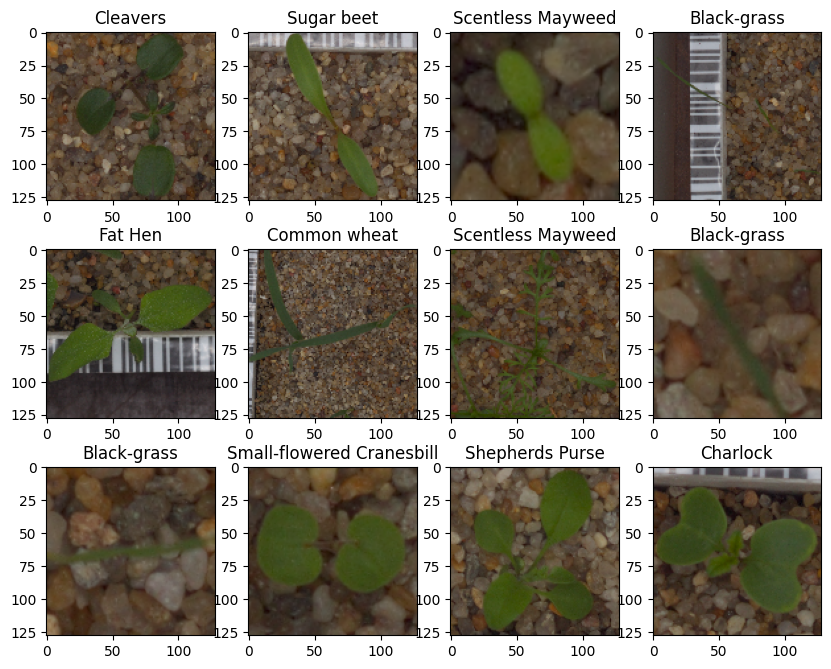

In [ ]:
plot_images(images,labels)

This coloration looks much more natural, will continue with the images converted to RGB.

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)

for i in range(len(images)):
    images_decreased.append(cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

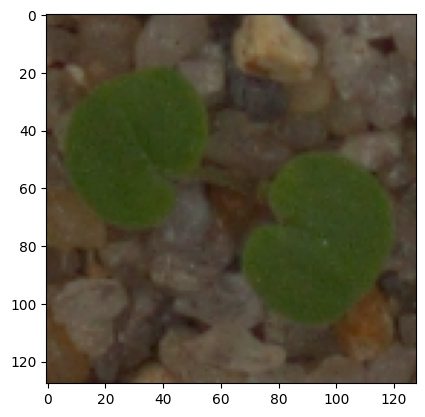

In [ ]:
plt.imshow(images[9])

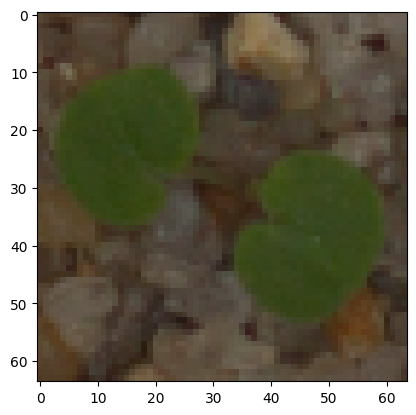

In [ ]:
plt.imshow(images_decreased[9])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
# Splitting the data into training and test sets
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size=0.1, random_state=42, stratify=labels)

# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

In [ ]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (3847, 64, 64, 3)
y_train: (3847, 1)
X_val: (428, 64, 64, 3)
y_val: (428, 1)
X_test: (475, 64, 64, 3)
y_test: (475, 1)


### Encode the target labels

In [ ]:
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

In [ ]:
print(y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape)

(3847, 12) (428, 12) (475, 12)


### Data Normalization

In [ ]:
# normalize the pixel values, convert from 0-255 to 0-1
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

## Model Building

### Model1

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:

# initialize the model as sequential
model1 = Sequential()

# Adding the first conv layer with 128 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of the output of the first conv layer
model1.add(MaxPooling2D((2, 2), padding='same'))

# Adding two similar convolution and max-pooling layers with activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation function as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Using the Adam Optimizer
opt = Adam()

# Compiling the model using suitable metric for the loss function
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

<b> Fitting the model on the train data:

In [ ]:
history_1 = model1.fit(
    X_train_normalized,  # Features of the training data
    y_train_encoded,     # Labels of the training data
    epochs=30,
    validation_data=(X_val_normalized, y_val_encoded),  # Validation data
    batch_size=32,
    verbose=2
)


Epoch 1/30
121/121 - 15s - loss: 2.4519 - accuracy: 0.1139 - val_loss: 2.4317 - val_accuracy: 0.1285 - 15s/epoch - 124ms/step
Epoch 2/30
121/121 - 1s - loss: 2.3070 - accuracy: 0.2085 - val_loss: 2.0261 - val_accuracy: 0.3528 - 1s/epoch - 11ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0104 - accuracy: 0.3130 - val_loss: 1.7734 - val_accuracy: 0.3902 - 1s/epoch - 11ms/step
Epoch 4/30
121/121 - 1s - loss: 1.8739 - accuracy: 0.3416 - val_loss: 1.7038 - val_accuracy: 0.4322 - 1s/epoch - 10ms/step
Epoch 5/30
121/121 - 1s - loss: 1.7728 - accuracy: 0.3629 - val_loss: 1.5546 - val_accuracy: 0.4743 - 1s/epoch - 9ms/step
Epoch 6/30
121/121 - 1s - loss: 1.6489 - accuracy: 0.4084 - val_loss: 1.4697 - val_accuracy: 0.5023 - 1s/epoch - 9ms/step
Epoch 7/30
121/121 - 1s - loss: 1.6061 - accuracy: 0.4328 - val_loss: 1.3305 - val_accuracy: 0.5631 - 1s/epoch - 9ms/step
Epoch 8/30
121/121 - 1s - loss: 1.5081 - accuracy: 0.4598 - val_loss: 1.2458 - val_accuracy: 0.5654 - 1s/epoch - 11ms/step
Epoch 9/30
121/1

**Model Evaluation**

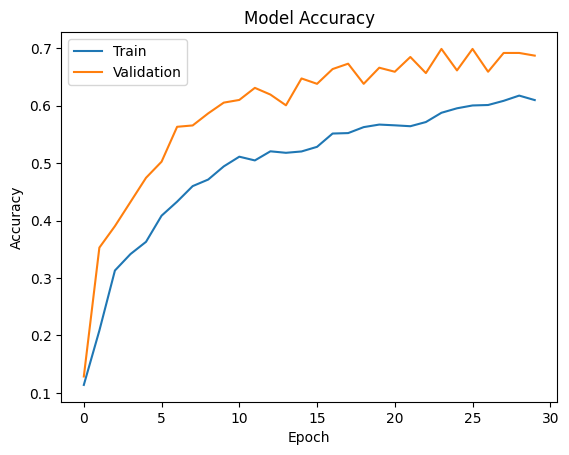

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The validation accuracy was found to be consistently higher than the training accuracy, this suggests that the model may not be learning as well as expected from the training data.


**Evaluate the model on test data**

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)


15/15 - 0s - loss: 0.9110 - accuracy: 0.7074 - 165ms/epoch - 11ms/step


**Plotting the Confusion Matrix**

In [ ]:
y_pred = model1.predict(X_test_normalized)


15/15 [==============================] - 0s 3ms/step


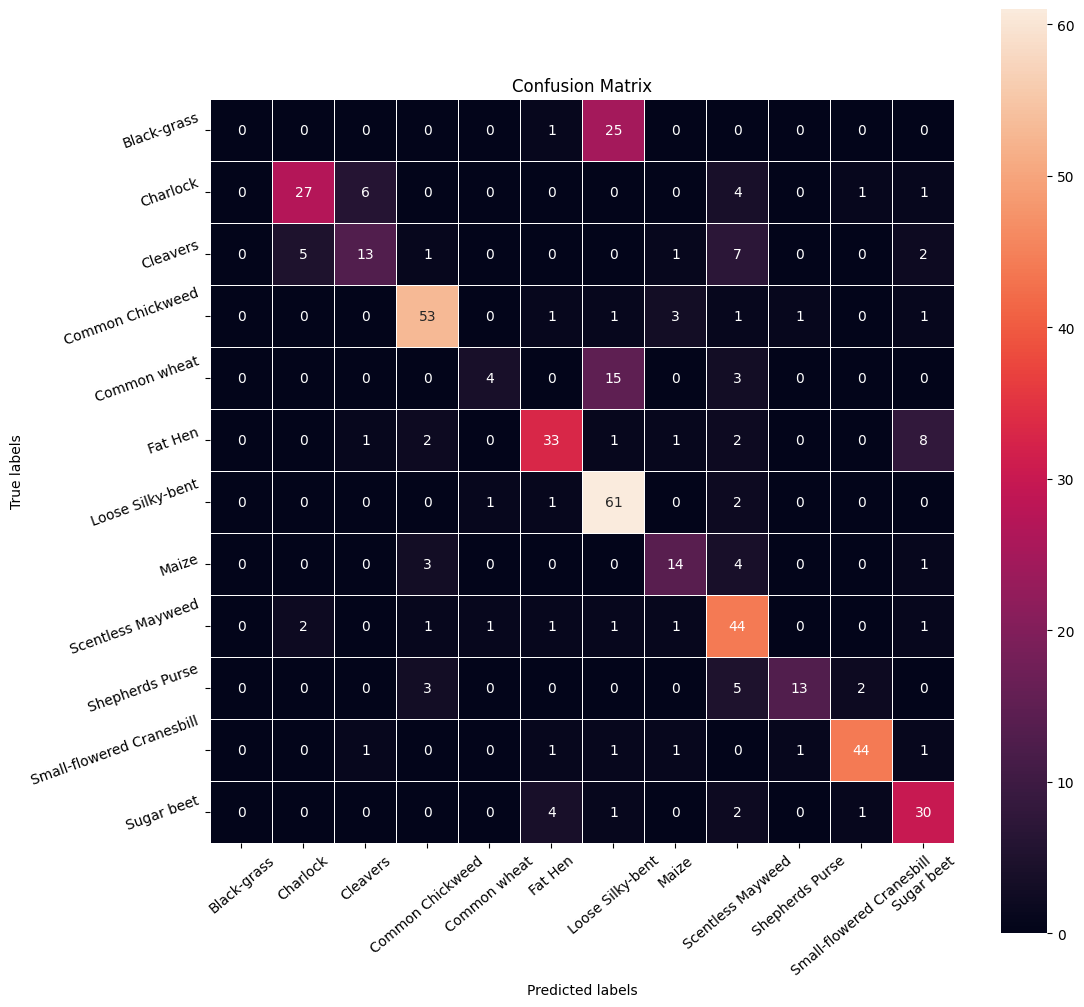

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion_matrix() function from sklearn
conf_matrix = confusion_matrix(y_test_arg, y_pred_arg)

# Plotting the Confusion Matrix using seaborn
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    conf_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()


**We observe that most of the classes are  predicted correctly**, but the misclassification occurs mostly with the black grass and loose silky-bent 25, and also common wheat which is sometimes confused with Loose Silky-bent 15, also the model is not predicting instances of black grass.

**Plotting Classification Report**

In [ ]:
from sklearn import metrics

# Assuming you have the predicted and true labels
cr = metrics.classification_report(y_test_arg, y_pred_arg)

print(cr)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.79      0.69      0.74        39
           2       0.62      0.45      0.52        29
           3       0.84      0.87      0.85        61
           4       0.67      0.18      0.29        22
           5       0.79      0.69      0.73        48
           6       0.58      0.94      0.71        65
           7       0.67      0.64      0.65        22
           8       0.59      0.85      0.70        52
           9       0.87      0.57      0.68        23
          10       0.92      0.88      0.90        50
          11       0.67      0.79      0.72        38

    accuracy                           0.71       475
   macro avg       0.67      0.63      0.63       475
weighted avg       0.69      0.71      0.68       475



**Class 0  (label 0):** This class has a precision, recall, and F1-Score of 0. The model is not predicting any instances of this class correctly. This could be due to issues such as imbalanced data or a problem with the model's ability to learn this particular class.

**Class 1 (label 1):**

The model achieved relatively high precision (0.79), recall (0.69), and F1-score (0.74) for this class.

**Class 6 (label 6):**

This class has high recall (0.94), suggesting the model is effective at capturing instances of this class. However, precision (0.58) is relatively lower, indicating a potential for false positives.

**Class 10 (label 10):**

This class has high precision (0.92), recall (0.88), and F1-score (0.90), indicating strong performance.

**Accuracy:** The overall accuracy of the model is reported as 71%, indicating the proportion of correctly classified instances out of the total.

**Conclusion:**The model appears to perform well for some classes (e.g., class 10) but struggles with others (e.g., class 0). It might be worthwhile to investigate why certain classes are more challenging for the model and consider strategies to improve performance, such as adjusting class weights, collecting more data for under-represented classes, or fine-tuning the model architecture.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
)


In [ ]:
# Initializing a sequential model
model2 = Sequential()

# Adding the first conv layer with 64 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of the output of the first conv layer
model2.add(MaxPooling2D((2, 2), padding='same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(BatchNormalization())

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate=0.3
model2.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation function as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Initializing Adam Optimizer
opt = Adam()

# Compiling the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

<b> Fitting the model on the train data

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history_2 = model2.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded, batch_size=batch_size, shuffle=False),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
    callbacks=[learning_rate_reduction]
)

Epoch 1/30
60/60 [==============================] - 11s 153ms/step - loss: 2.1319 - accuracy: 0.2519 - val_loss: 2.4117 - val_accuracy: 0.1285 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 7s 114ms/step - loss: 1.6780 - accuracy: 0.4105 - val_loss: 2.2871 - val_accuracy: 0.1963 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 5s 83ms/step - loss: 1.4892 - accuracy: 0.4777 - val_loss: 2.2232 - val_accuracy: 0.2430 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 6s 104ms/step - loss: 1.4324 - accuracy: 0.5046 - val_loss: 2.1334 - val_accuracy: 0.3785 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 6s 105ms/step - loss: 1.3125 - accuracy: 0.5332 - val_loss: 2.0575 - val_accuracy: 0.3061 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 5s 90ms/step - loss: 1.1938 - accuracy: 0.5776 - val_loss: 1.6871 - val_accuracy: 0.4136 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 7s 114ms/step - los

**Model Evaluation**

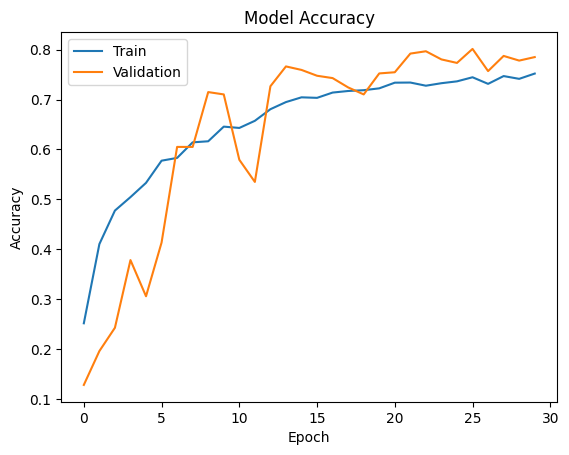

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The model seems to have trained nicely, with an accuracy of 76.84 on unseen data.

**Evaluate the model on test data**

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.7856 - accuracy: 0.7684 - 177ms/epoch - 12ms/step


**Plotting the Confusion Matrix**

In [ ]:
y_pred = model2.predict(X_test_normalized)

15/15 [==============================] - 0s 4ms/step


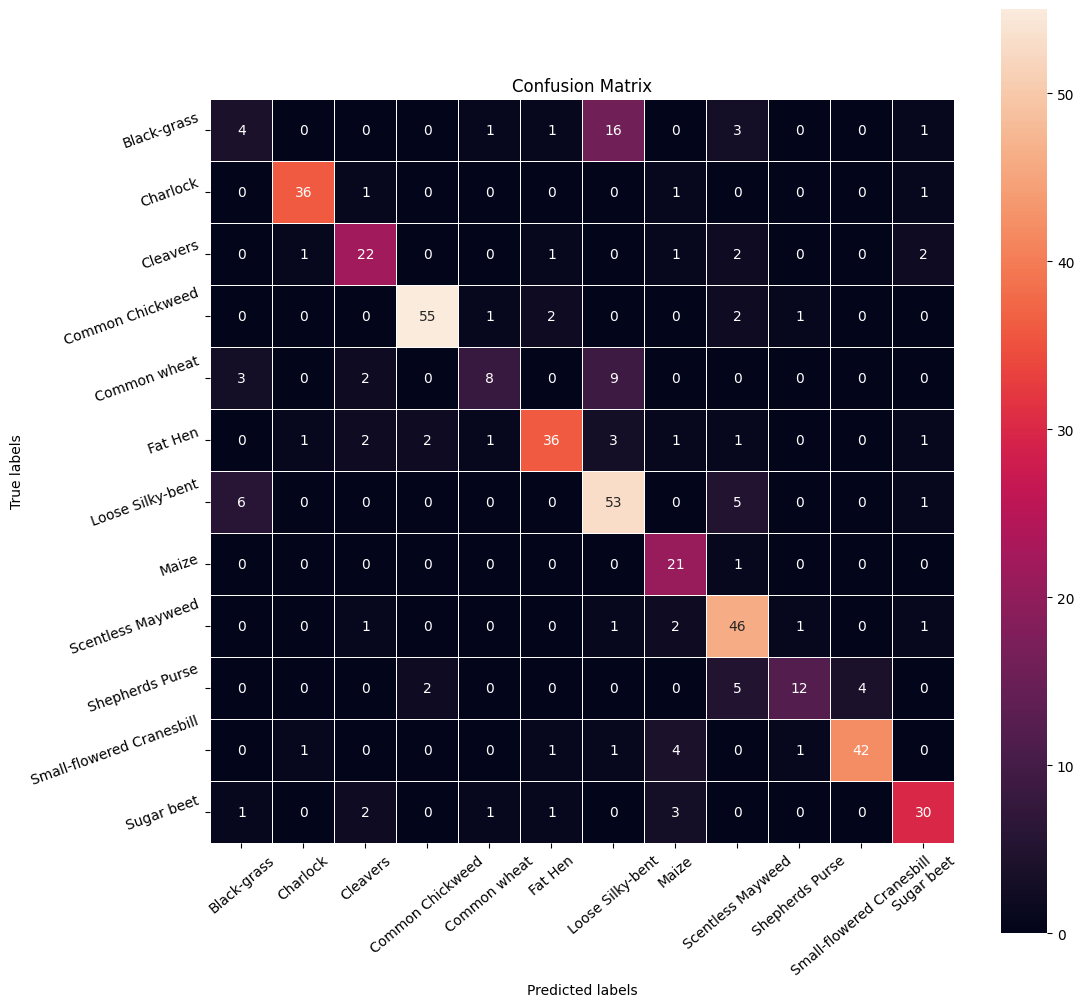

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Obtaining the confusion matrix using the confusion_matrix() function
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

# Plotting the Confusion Matrix using seaborn
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()


**We observe that most of the classes are  predicted correctly**, but the misclassification occurs mostly with the black grass and loose silky-bent 16, and also common wheat which is sometimes confused with Loose Silky-bent 9.

**Plotting Classification Report**

In [ ]:
# Plotting the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.29      0.15      0.20        26
           1       0.92      0.92      0.92        39
           2       0.73      0.76      0.75        29
           3       0.93      0.90      0.92        61
           4       0.67      0.36      0.47        22
           5       0.86      0.75      0.80        48
           6       0.64      0.82      0.72        65
           7       0.64      0.95      0.76        22
           8       0.71      0.88      0.79        52
           9       0.80      0.52      0.63        23
          10       0.91      0.84      0.87        50
          11       0.81      0.79      0.80        38

    accuracy                           0.77       475
   macro avg       0.74      0.72      0.72       475
weighted avg       0.77      0.77      0.76       475



**Observation:**

**Class 1 (label 1):**

High precision (0.92), recall (0.92), and F1-score (0.92), indicating excellent performance for this class.

**Class 3 (label 3)** also shows high precision (0.93), recall (0.90), and F1-score (0.92), suggesting strong performance.

**Class 4 (label 4)** has low precision (0.75) and recall (0.14), suggesting that the model struggles with this class, possibly due to imbalanced data or other challenges.

**Class 6 (label 6):**

Decent precision (0.64), high recall (0.82), and a balanced F1-score (0.72), suggesting effective performance with room for improvement in precision.

**Class 7 (label 7)** has high recall (0.95) but lower precision (0.64) indicating that the model is effective at capturing instances of this class but may also have false positives.


**Class 10 (label 10):**

High precision (0.91), recall (0.84), and F1-score (0.87), indicating strong performance.

The overall accuracy of the model is reported as 77%, indicating the proportion of correctly classified instances out of the total.

Model2 seems to perform better than Model1, lets see if we can improve on the model

### Model3

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# initialize the model as sequential
model3 = Sequential()

In [ ]:
# start with a conv layer
model3.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())
model3.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())

# flatten
model3.add(Flatten())

# ANN layers
model3.add(Dense(64, activation='relu'))
model3.add(Dropout((0.25)))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout((0.25)))
model3.add(Dense(16, activation='relu'))

#output layer
model3.add(Dense(12, activation='softmax'))

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                        

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5,) #restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, mode='auto', min_delta=0.00001)
callbacks = (early_stop, reduce_lr)

history_3 = model3.fit(X_train_normalized, y_train_encoded,
                    validation_data=(X_val_normalized, y_val_encoded),
                    epochs=50,
                    batch_size=32,
                    verbose=2,
                    callbacks=callbacks
)

Epoch 1/50
121/121 - 4s - loss: 2.2319 - accuracy: 0.2514 - val_loss: 3.1733 - val_accuracy: 0.1379 - lr: 0.0010 - 4s/epoch - 35ms/step
Epoch 2/50
121/121 - 1s - loss: 1.6491 - accuracy: 0.4474 - val_loss: 3.6779 - val_accuracy: 0.1168 - lr: 0.0010 - 947ms/epoch - 8ms/step
Epoch 3/50
121/121 - 1s - loss: 1.3269 - accuracy: 0.5498 - val_loss: 4.5351 - val_accuracy: 0.1659 - lr: 0.0010 - 907ms/epoch - 7ms/step
Epoch 4/50
121/121 - 1s - loss: 1.1186 - accuracy: 0.6070 - val_loss: 3.2864 - val_accuracy: 0.2500 - lr: 5.0000e-04 - 938ms/epoch - 8ms/step
Epoch 5/50
121/121 - 1s - loss: 1.0262 - accuracy: 0.6460 - val_loss: 1.7370 - val_accuracy: 0.4673 - lr: 5.0000e-04 - 946ms/epoch - 8ms/step
Epoch 6/50
121/121 - 1s - loss: 0.9198 - accuracy: 0.6785 - val_loss: 0.9326 - val_accuracy: 0.6939 - lr: 5.0000e-04 - 920ms/epoch - 8ms/step
Epoch 7/50
121/121 - 1s - loss: 0.8462 - accuracy: 0.7081 - val_loss: 0.8871 - val_accuracy: 0.7150 - lr: 5.0000e-04 - 978ms/epoch - 8ms/step
Epoch 8/50
121/121 -

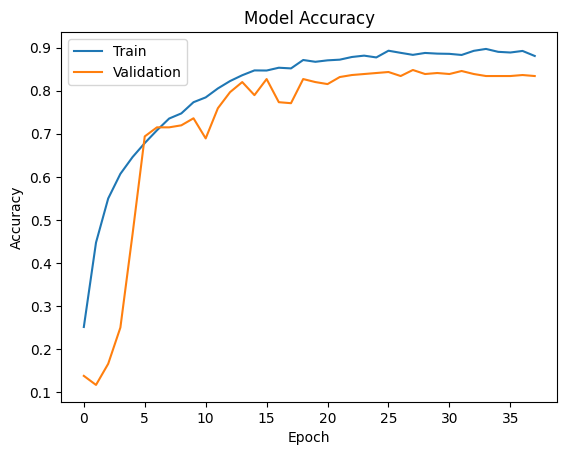

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.5454 - accuracy: 0.8232 - 113ms/epoch - 8ms/step


15/15 [==============================] - 0s 4ms/step


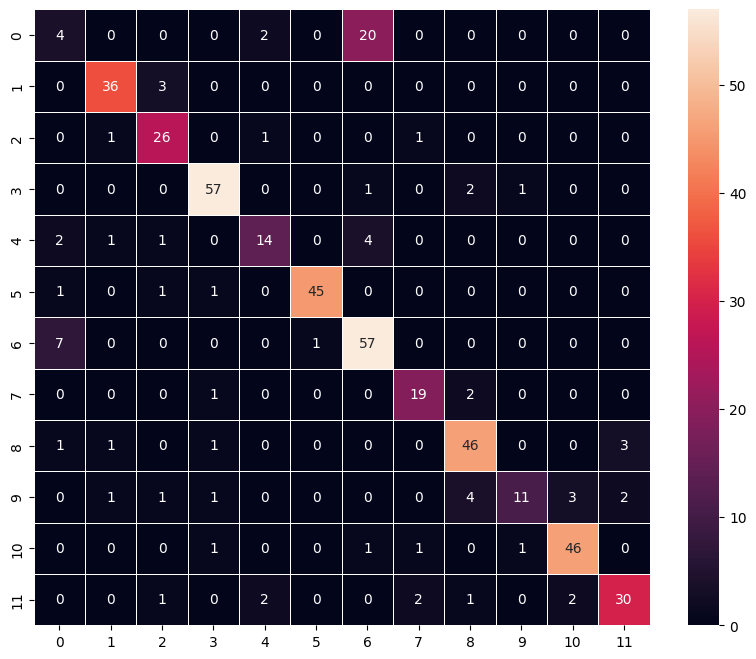

In [ ]:
y_pred4 = model3.predict(X_test_normalized)
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred4_arg=np.argmax(y_pred4,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred4_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**We observe that most of the classes are  predicted correctly**, but the misclassification occurs mostly with the black grass and loose silky-bent 20.

In [ ]:
cr3 =metrics.classification_report(y_test_arg,y_pred4_arg, output_dict=True)
f1_3 = cr3['macro avg']['f1-score']
acc_3 = cr3['accuracy']
print('f1-score:',f1_3)
print('Accuracy:', acc_3)


f1-score: 0.777572895586653
Accuracy: 0.8231578947368421


In [ ]:
cr3 =metrics.classification_report(y_test_arg,y_pred4_arg)
print(cr3)

              precision    recall  f1-score   support

           0       0.27      0.15      0.20        26
           1       0.90      0.92      0.91        39
           2       0.79      0.90      0.84        29
           3       0.92      0.93      0.93        61
           4       0.74      0.64      0.68        22
           5       0.98      0.94      0.96        48
           6       0.69      0.88      0.77        65
           7       0.83      0.86      0.84        22
           8       0.84      0.88      0.86        52
           9       0.85      0.48      0.61        23
          10       0.90      0.92      0.91        50
          11       0.86      0.79      0.82        38

    accuracy                           0.82       475
   macro avg       0.80      0.77      0.78       475
weighted avg       0.82      0.82      0.81       475



**Observation**

**Class 1 (label 1):**

High precision (0.90), recall (0.92), and F1-score (0.91), indicating excellent performance for this class.

**Class 3 (label 3)** also shows high precision (0.92), recall (0.93), and F1-score (0.93), suggesting strong performance.

**Class 5 (label 5):**

Very high precision (0.98) and recall (0.94), resulting in an outstanding F1-score (0.96), indicating excellent performance.

**Class 6 (label 6)** has a high recall (0.88), but a slightly lower precision (0.69), leading to a balanced F1-score (0.77).

**Class 9 (label 9)** has relatively lower precision (0.85) and recall (0.48), resulting in a moderate F1-score (0.61).

**Class 10 (label 10):**

High precision (0.90), recall (0.92), and F1-score (0.91), indicating strong performance.

**Accuracy:**

The overall accuracy of the model is reported as 82%, indicating the proportion of correctly classified instances out of the total.

In summary, the classification report provides a detailed evaluation of the model's performance for each class and overall. The macro and weighted averages offer insights into the model's generalization across all classes, considering both class-wise performance and class imbalance. An overall accuracy of 82% suggests that the model is performing well.

## Final Model

**Comment:**

Model 3 has higher accuracies across all three sets, indicating better overall performance. This suggests that Model 2 is likely a more robust and effective model.

Also there is less misclassification when it comes to the labels in model 3, model 3 has strong performance for most of the classes
Training Accuracy: 0.8807
Validation Accuracy: 0.8341
Test Accuracy: 0.8232

The model demonstrates strong performance across multiple metrics (precision, recall, f1-score).

### Visualizing the prediction

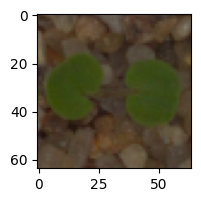

1/1 [==============================] - 0s 30ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


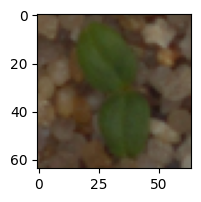

1/1 [==============================] - 0s 27ms/step
Predicted Label ['Cleavers']
True Label Cleavers


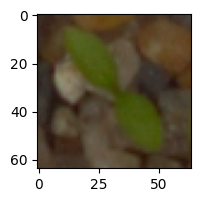

1/1 [==============================] - 0s 28ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


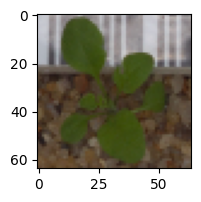

1/1 [==============================] - 0s 28ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Predicting the test data using the best model
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Predicting the test data using the best model
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Predicting the test data using the best model
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Predicting the test data using the best model
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

**Insights**
CNN with Batch Normalization, Maxpooling, dropouts + Dense layers is a good combination for image classification.

We have built a CNN-model to predict the class of a plant, which works quite well. (Increasing number of epochs and/or adding layers to a model can even increase the performance)

**Recommendation**
I recommend using model 3.  It is accurate to between 80 and 82%, which will drastically reduce the amount of manual classification work for farmers.  This model has the added benefit of requiring little image preprocessing and no costly data augmentation.


_____